# ✈️ Airline Passenger Satisfaction Prediction

In this project, we aim to build a machine learning model to predict passenger satisfaction based on various features related to airline services and flight experience. The dataset contains information such as customer type, travel class, service ratings (like inflight wifi, seat comfort, cleanliness), and delay times.

We will use a **Decision Tree Classifier** to analyze the data and identify the key factors that contribute to a passenger being *satisfied* or *dissatisfied* with their flight.

The overall process includes:
- Exploratory data analysis
- Data cleaning and preprocessing
- Model training and evaluation
- Visualizing the decision tree and interpreting the results

Let’s begin by loading and exploring the dataset.


In [2]:
import pandas as pd

full_data = pd.read_csv('Airplane.csv')

full_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 📊 Dataset Dimensions

Let's check the overall size of the dataset — the number of rows (samples) and columns (features).


In [4]:
full_data.shape

(103904, 25)

## 🧾 Dataset Overview and Feature Description

In this step, we will inspect the overall structure of the dataset using `.info()` to understand the types of features, their data types, and the presence of any missing values.

The dataset includes the following variables:

- **id**: Unique identifier for each passenger.
- **Gender**: Gender of the passenger (*Male* or *Female*).
- **Customer Type**: Indicates whether the passenger is a *Loyal* or *Disloyal* customer.
- **Age**: Age of the passenger.
- **Type of Travel**: Purpose of the trip — either *Business Travel* or *Personal Travel*.
- **Class**: Travel class — *Business*, *Eco*, or *Eco Plus*.
- **Flight Distance**: Distance (in miles) of the flight.
- **Inflight wifi service**: Rating for in-flight Wi-Fi service (0 = Not Applicable, 1–5).
- **Departure/Arrival time convenient**: Rating of time convenience.
- **Ease of Online booking**: Satisfaction with the online booking process.
- **Gate location**: Satisfaction with the gate location at the airport.
- **Food and drink**: Satisfaction with food and beverages offered.
- **Online boarding**: Satisfaction with the online boarding process.
- **Seat comfort**: Satisfaction with seat comfort.
- **Inflight entertainment**: Satisfaction with in-flight entertainment.
- **On-board service**: Overall rating of in-flight service.
- **Leg room service**: Satisfaction with the amount of leg room.
- **Baggage handling**: Satisfaction with baggage handling services.
- **Check-in service**: Satisfaction with the check-in process.
- **Inflight service**: General rating of in-flight service.
- **Cleanliness**: Rating of aircraft cleanliness.
- **Departure Delay in Minutes**: Delay at departure (in minutes).
- **Arrival Delay in Minutes**: Delay upon arrival (in minutes).
- **Satisfaction**: Target variable — either *Satisfied* or *Neutral or Dissatisfied*.



In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

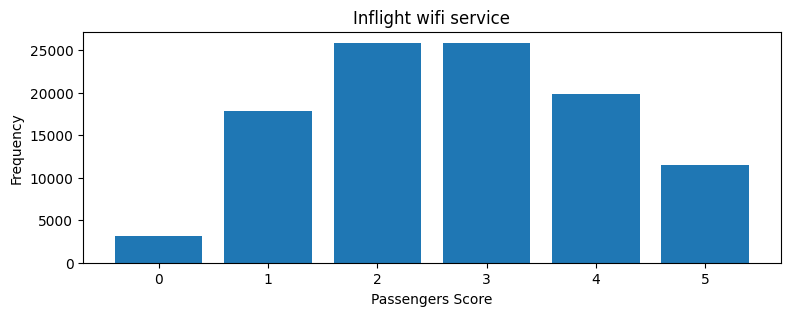

Inflight wifi service: 
 Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64


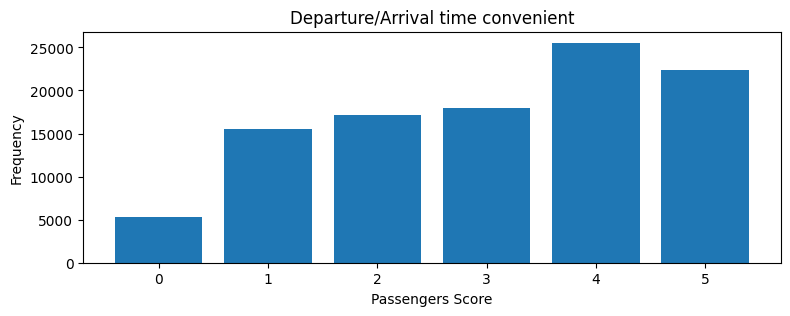

Departure/Arrival time convenient: 
 Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64


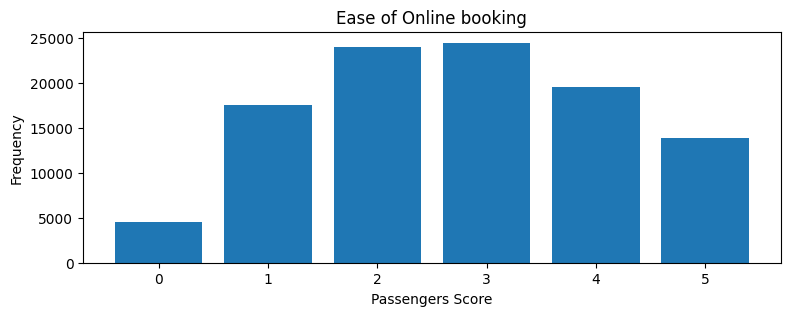

Ease of Online booking: 
 Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: count, dtype: int64


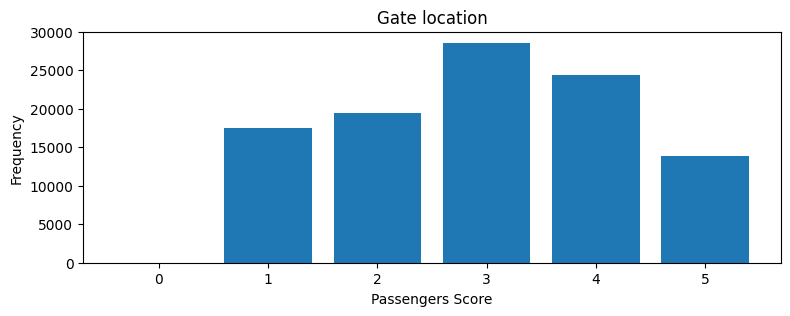

Gate location: 
 Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: count, dtype: int64


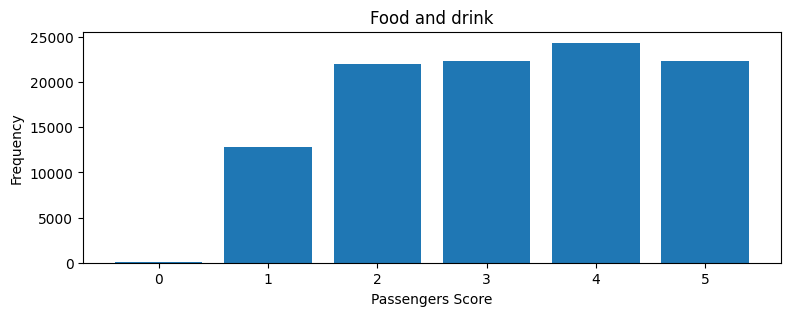

Food and drink: 
 Food and drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: count, dtype: int64


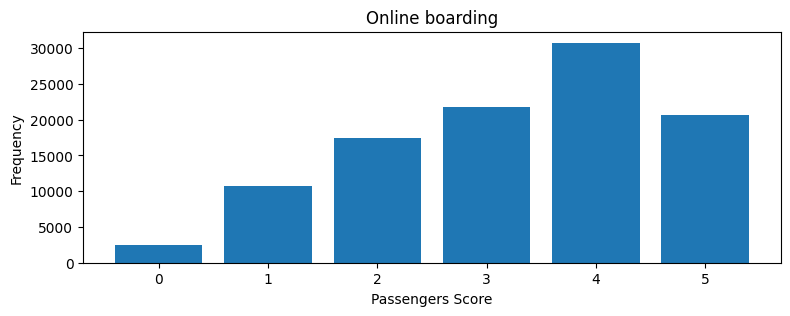

Online boarding: 
 Online boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: count, dtype: int64


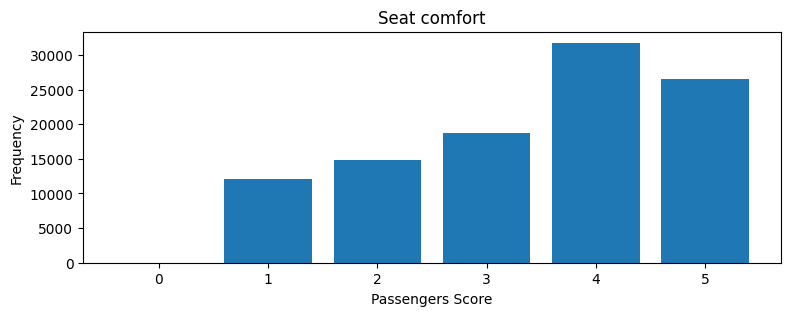

Seat comfort: 
 Seat comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: count, dtype: int64


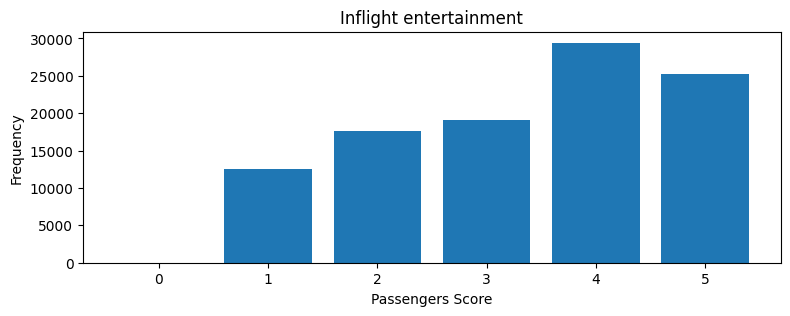

Inflight entertainment: 
 Inflight entertainment
4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: count, dtype: int64


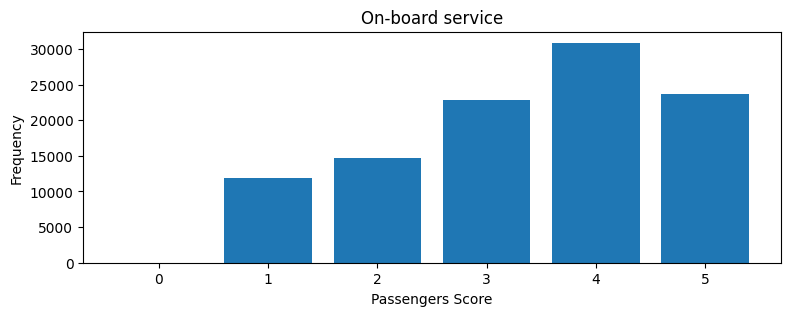

On-board service: 
 On-board service
4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: count, dtype: int64


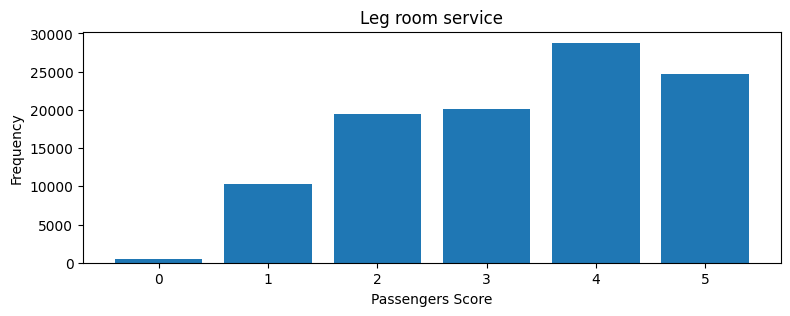

Leg room service: 
 Leg room service
4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: count, dtype: int64


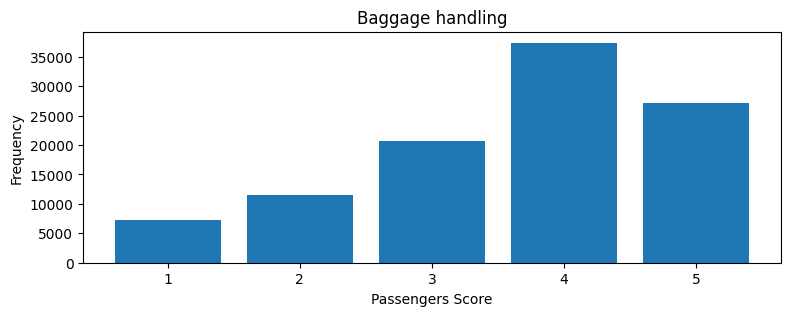

Baggage handling: 
 Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64


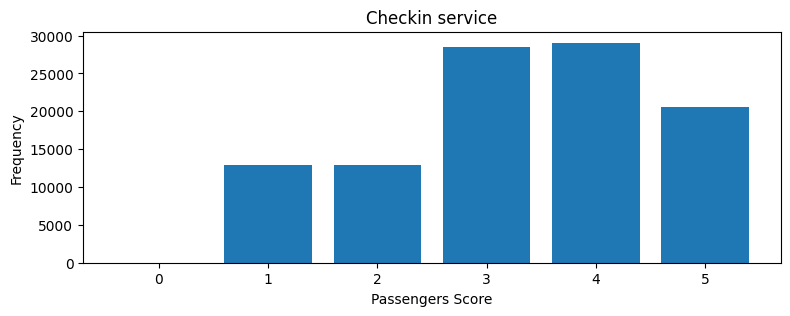

Checkin service: 
 Checkin service
4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: count, dtype: int64


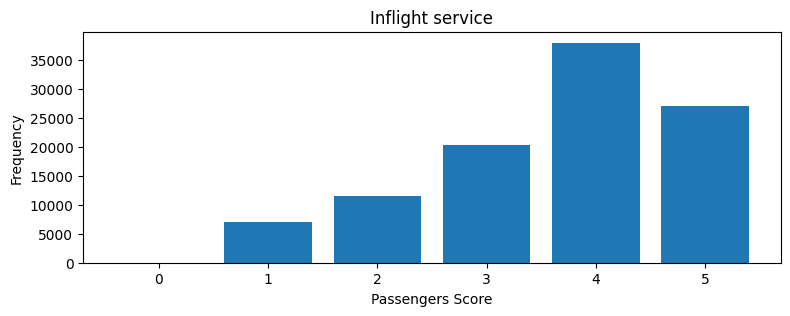

Inflight service: 
 Inflight service
4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: count, dtype: int64


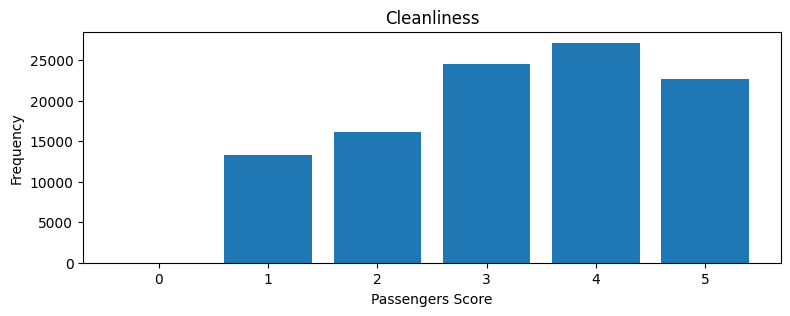

Cleanliness: 
 Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt

def bar_plot(variable):
    
    var=full_data[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

categorical_features=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in categorical_features:
    bar_plot(c)